# Bank Portfolio

## Invest in Bank Stocks

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [6]:
# input
symbols = ['BAC','WFC','MS','C']
start = '2010-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 completed


,BAC,C,MS,WFC
Date,,,,
2010-01-04,12.977037,27.558563,23.796576,19.222212
2010-01-05,13.398851,28.612265,24.666515,19.749907
2010-01-06,13.555999,29.503862,24.982159,19.778049
2010-01-07,14.002623,29.584913,25.343994,20.495714
2010-01-08,13.878564,29.098597,24.828184,20.305752


In [7]:
df.tail()

,BAC,C,MS,WFC
Date,,,,
2018-12-24,20.454979,42.068916,32.398193,38.297302
2018-12-26,21.696852,43.930664,34.402836,40.045288
2018-12-27,21.930830,44.212498,34.717979,39.992580
2018-12-28,21.948828,44.263741,34.464119,40.212170
2018-12-31,22.173809,44.460155,34.709229,40.475685


In [8]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
9 years


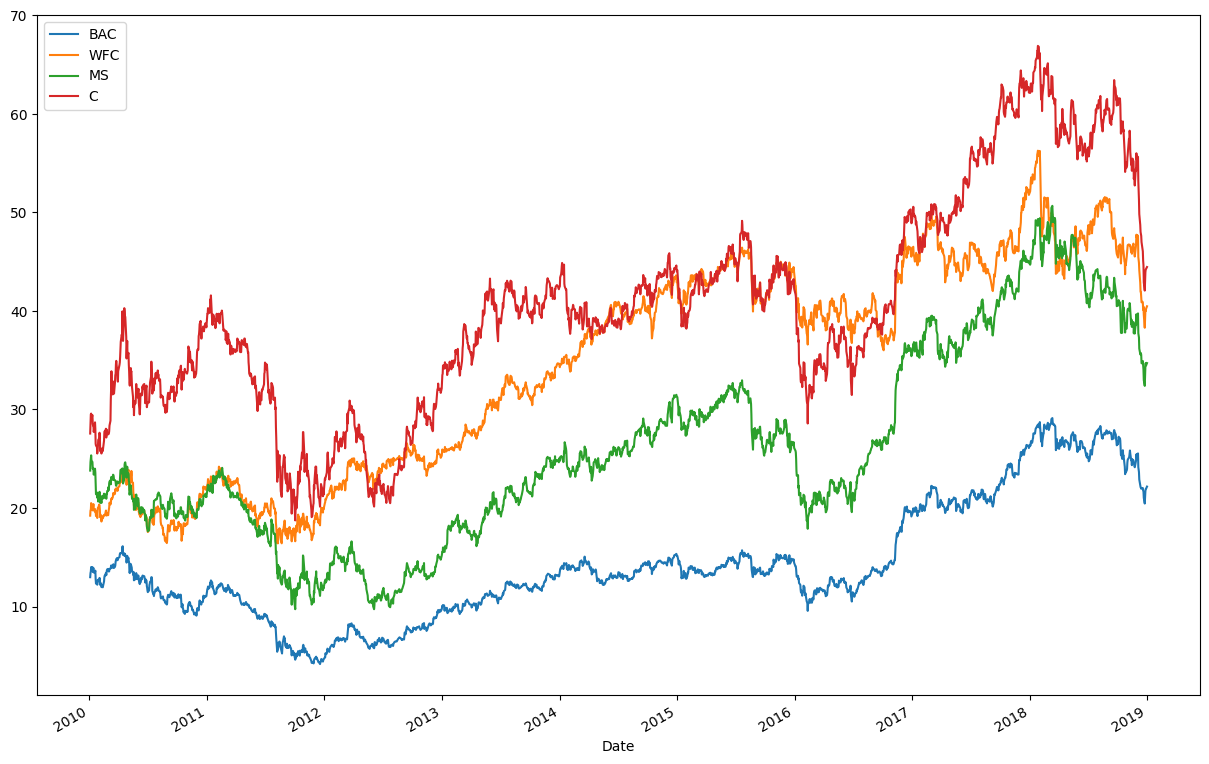

In [9]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [10]:
for s in symbols:
    print(s + ":",  df[s].max())

BAC: 29.12843894958496
WFC: 56.26763916015625
MS: 50.672401428222656
C: 66.90743255615234


In [11]:
for s in symbols:
    print(s + ":",  df[s].min())

BAC: 4.1592631340026855
WFC: 16.410133361816406
MS: 9.726203918457031
C: 18.74123191833496


In [12]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,BAC Return,WFC Return,MS Return,C Return
Date,,,,
2010-01-05,0.031988,0.027082,0.035905,0.037522
2010-01-06,0.011660,0.001424,0.012715,0.030686
2010-01-07,0.032415,0.035643,0.014380,0.002743
2010-01-08,-0.008899,-0.009312,-0.020562,-0.016575


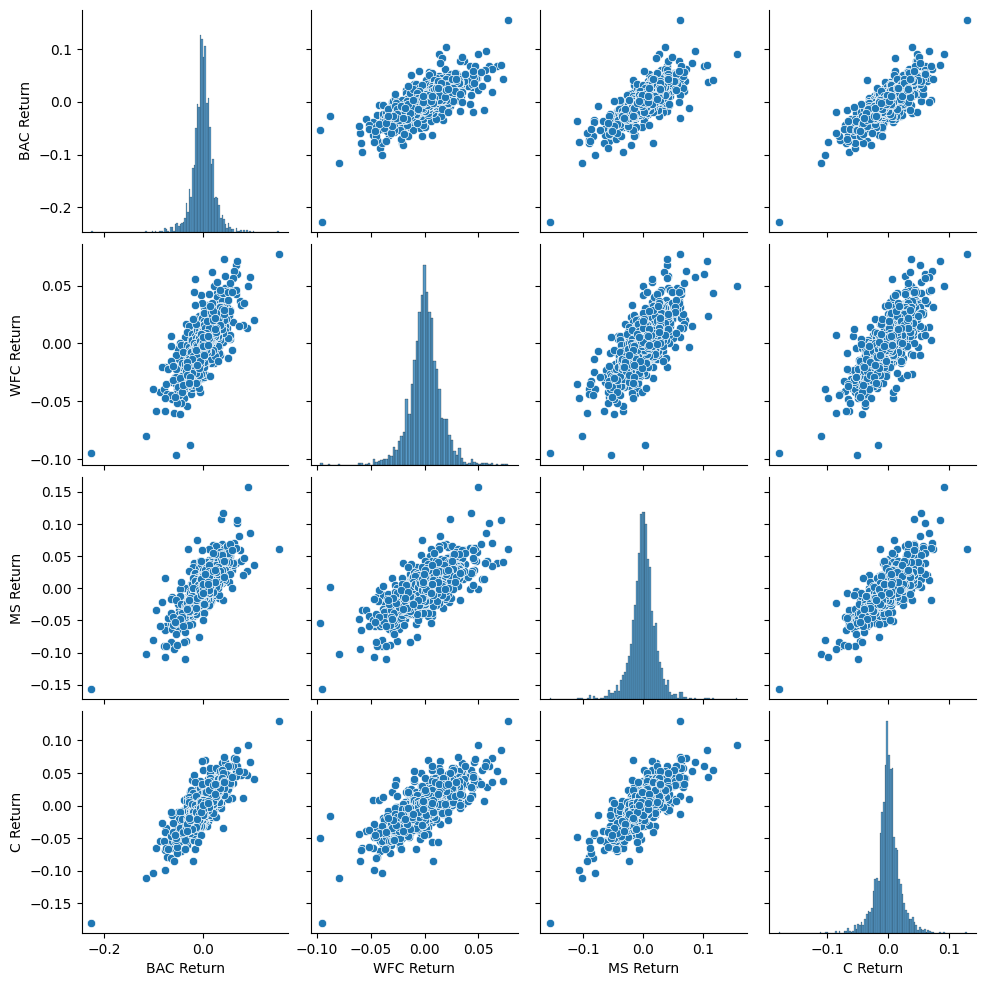

In [13]:
sns.pairplot(returns[1:])

In [14]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
BAC Return   2011-08-09
WFC Return   2011-08-09
MS Return    2011-10-27
C Return     2011-08-09
dtype: datetime64[ns]


Worst Day Returns
--------------------
BAC Return   2011-08-08
WFC Return   2018-02-05
MS Return    2011-08-08
C Return     2011-08-08
dtype: datetime64[ns]


In [17]:
# plt.figure(figsize=(17,13))

# for r in returns:
    # sns.kdeplot(returns.ix["2011-01-01" : "2011-12-31 "][r])

In [18]:
returns.corr()

,BAC Return,WFC Return,MS Return,C Return
BAC Return,1.000000,0.757169,0.795551,0.832349
WFC Return,0.757169,1.000000,0.725767,0.750073
MS Return,0.795551,0.725767,1.000000,0.808377
C Return,0.832349,0.750073,0.808377,1.000000


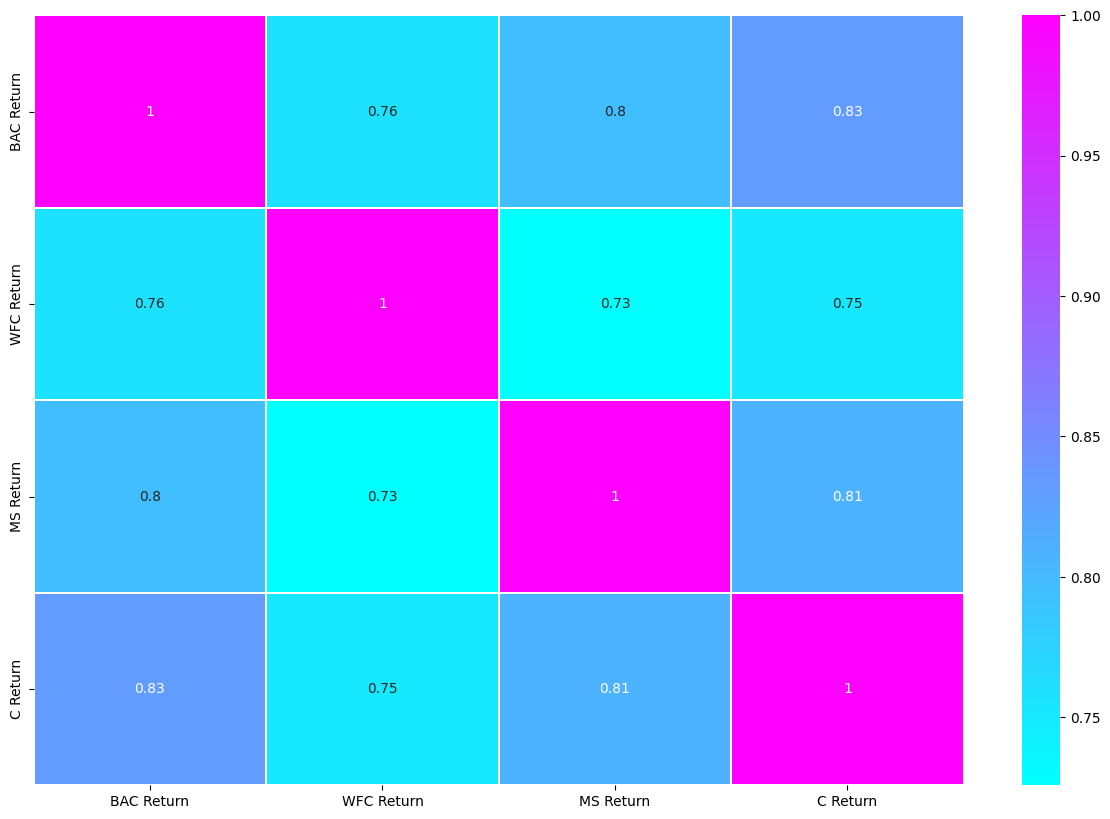

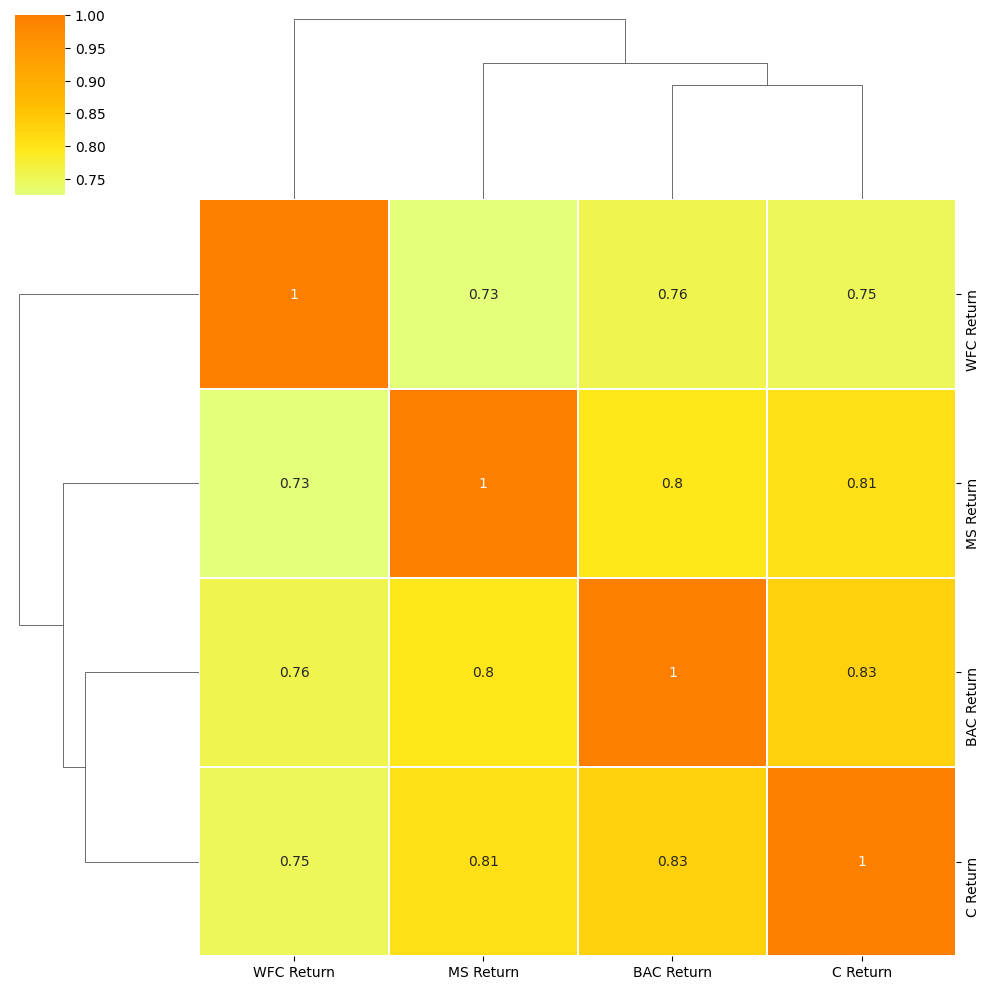

In [19]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

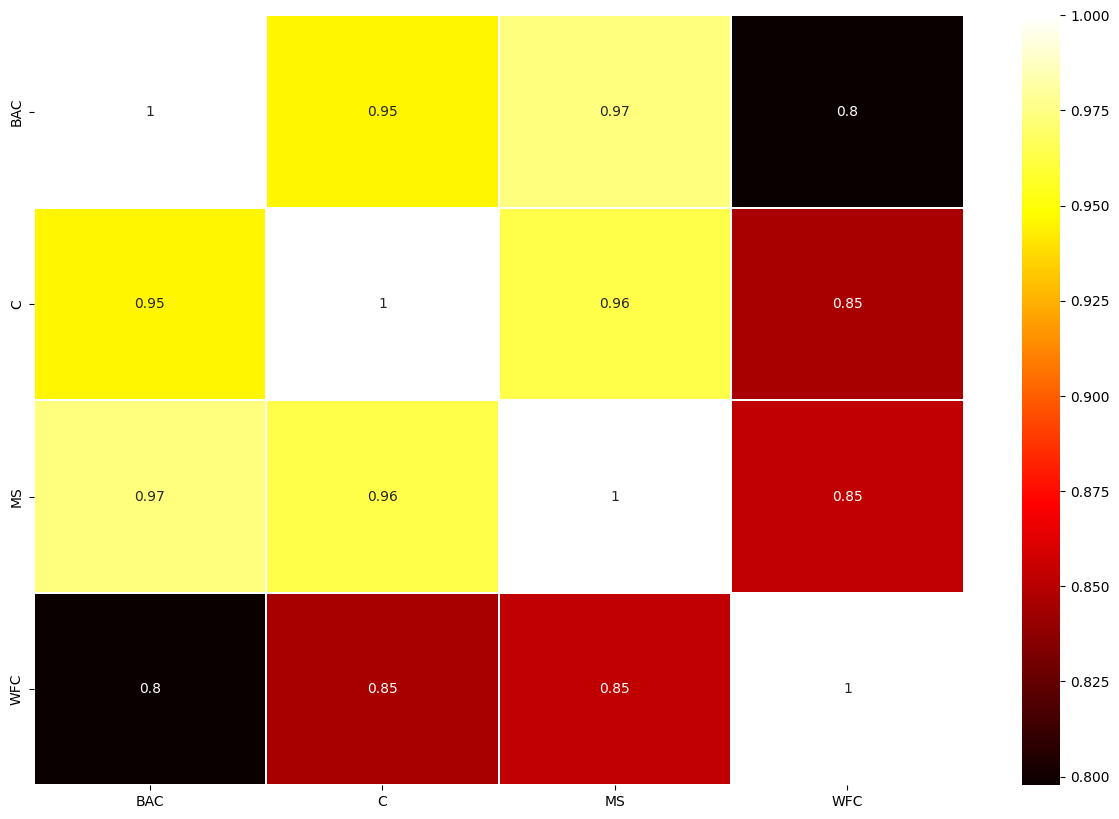

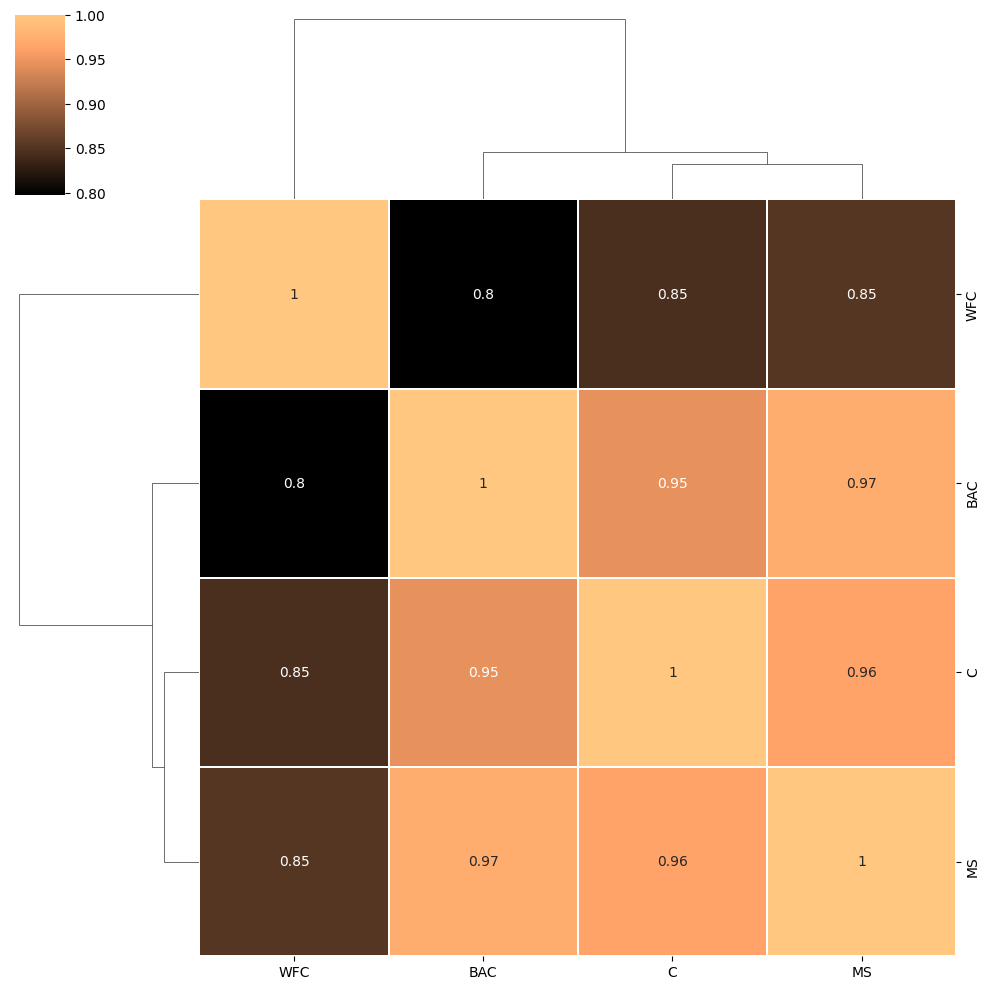

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [21]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BAC: 25000.0
C: 25000.0
MS: 25000.0
WFC: 25000.0


In [22]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BAC: 1926
C: 907
MS: 1050
WFC: 1300


In [23]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BAC: $24993.77
C: $24995.62
MS: $24986.4
WFC: $24988.88


In [24]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BAC: $42706.76
C: $40325.36
MS: $36444.69
WFC: $52618.39


In [25]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $172095.2
